In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# NOTE: librosa dependencies apparently require specific versions of numpy, try numpy==1.21.4
import librosa
import librosa.display
import seaborn as sns
import IPython.display

In [31]:
eq_df = pd.read_csv('./large_data/indexedfinal.csv')
eq_correction = pd.read_csv('./large_data/eq_only_corrected.csv')
eq_correction.fillna(0)
eq_df.sort_values(by="index", inplace=True, ignore_index=True)
display(eq_df)

,index,class,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,...,eq_10000,eq_15000,eq_20000,crestfactor,salience,harmonic_power,percussive_power,harmonic_hits,percussive_hits,fold
0,0,dog_bark,0.042073,0.037768,0.037040,0.040564,0.103124,0.126494,0.166781,0.199152,...,7.060339,5.324175,4.841554,7.006769,1,0.000005,2.825963e-03,11.321429,1,5
1,1,children_playing,7.185887,6.910740,7.921071,7.460572,7.698635,7.091304,6.637689,5.694018,...,0.556369,0.417778,0.379089,11.940308,1,0.000006,2.081879e-05,133.344928,0,5
2,2,children_playing,6.597605,6.398027,6.016003,6.052477,5.801635,5.684627,5.734884,4.941867,...,0.319594,0.240222,0.218051,8.454538,1,0.000016,3.140698e-07,87.182609,2,5
3,3,children_playing,5.929216,5.157348,5.165380,5.563031,5.046141,5.564920,5.776320,6.222735,...,0.808725,0.608560,0.552146,9.255638,1,0.000011,8.845374e-05,150.472464,4,5
4,4,children_playing,8.538324,6.440980,6.393698,7.740646,7.195990,7.131680,6.614982,5.932448,...,0.450104,0.338348,0.307133,6.102388,1,0.000028,5.712090e-07,75.727536,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,8727,car_horn,2.228170,2.972869,3.430412,3.801715,5.101242,5.173664,5.687871,5.096503,...,0.587284,0.441381,0.400527,7.153451,2,0.000120,3.828546e-07,207.014493,0,7
8728,8728,car_horn,2.685533,2.139769,2.083099,2.181417,2.495794,2.707547,2.518987,2.219531,...,1.508850,1.136151,1.032083,7.721215,2,0.001297,5.428997e-07,108.151351,1,7
8729,8729,car_horn,3.132223,2.452053,2.546355,2.729121,3.563305,4.425730,4.677102,4.777865,...,2.370569,1.788467,1.622412,15.893921,2,0.000040,3.741536e-06,126.966887,3,7
8730,8730,car_horn,1.599208,1.839636,3.051158,3.095292,5.155525,5.937903,5.650943,5.174344,...,0.955482,0.718008,0.651918,7.465270,2,0.000432,3.024667e-07,73.472477,1,7


In [32]:
display(eq_correction)

,class,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,eq_160,...,eq_10000,eq_15000,eq_20000,crestfactor,salience,harmonic_power,percussive_power,harmonic_hits,percussive_hits,fold
0,0dog_bark,0.042073,0.032028,0.035341,0.052309,0.219308,0.204393,0.247356,0.304356,0.908070,...,0.448788,0.111312,0.060447,7.006769,1,5,NaN,NaN,NaN,NaN
1,1children_playing,7.185887,6.635593,9.941734,6.079072,8.174761,5.269312,5.730459,2.863005,1.885250,...,0.021276,0.002007,0.001634,11.940308,1,5,NaN,NaN,NaN,NaN
2,2children_playing,6.597605,6.198449,5.251955,6.161898,5.299951,5.333605,5.835399,2.562814,1.899669,...,0.011874,0.002106,0.001745,8.454538,1,5,NaN,NaN,NaN,NaN
3,3children_playing,5.929216,4.385479,5.181444,6.755984,4.012363,7.121256,6.199119,7.561980,2.231106,...,0.080481,0.008067,0.001764,9.255638,1,5,NaN,NaN,NaN,NaN
4,4children_playing,8.538324,4.343637,6.299134,11.781491,6.106678,6.938751,5.581585,3.884845,2.673044,...,0.018554,0.003077,0.002598,6.102388,1,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,8727car_horn,2.228170,3.717568,4.345498,4.915625,7.700297,5.390928,6.716286,3.322397,5.469879,...,0.060502,0.003672,0.001949,7.153451,2,7,NaN,NaN,NaN,NaN
8728,8728car_horn,2.685533,1.568016,1.972336,2.485734,3.124547,3.342808,2.141866,1.310596,1.708746,...,0.388145,0.018053,0.001265,7.721215,2,7,NaN,NaN,NaN,NaN
8729,8729car_horn,3.132223,1.752451,2.737651,3.282643,5.243589,7.025326,5.181643,5.080871,12.241353,...,0.797738,0.042162,0.002300,15.893921,2,7,NaN,NaN,NaN,NaN
8730,8730car_horn,1.599208,2.089682,5.522662,3.224299,9.358400,8.269696,5.074183,3.753889,4.202309,...,0.097892,0.005585,0.001554,7.465270,2,7,NaN,NaN,NaN,NaN


In [33]:
eq_df['eq_0'] = eq_correction['eq_0']
eq_df['eq_10'] = eq_correction['eq_10']
eq_df['eq_20'] = eq_correction['eq_20']
eq_df['eq_30'] = eq_correction['eq_30']
eq_df['eq_40'] = eq_correction['eq_40']
eq_df['eq_60'] = eq_correction['eq_60']
eq_df['eq_80'] = eq_correction['eq_80']
eq_df['eq_120'] = eq_correction['eq_120']
eq_df['eq_160'] = eq_correction['eq_160']
eq_df['eq_230'] = eq_correction['eq_230']
eq_df['eq_300'] = eq_correction['eq_300']
eq_df['eq_450'] = eq_correction['eq_450']
eq_df['eq_600'] = eq_correction['eq_600']
eq_df['eq_900'] = eq_correction['eq_900']
eq_df['eq_1200'] = eq_correction['eq_1200']
eq_df['eq_1800'] = eq_correction['eq_1800']
eq_df['eq_2400'] = eq_correction['eq_2400']
eq_df['eq_3700'] = eq_correction['eq_3700']
eq_df['eq_5000'] = eq_correction['eq_5000']
eq_df['eq_7500'] = eq_correction['eq_7500']
eq_df['eq_10000'] = eq_correction['eq_10000']
eq_df['eq_15000'] = eq_correction['eq_15000']
eq_df['eq_20000'] = eq_correction['eq_20000']

In [36]:
display(eq_df)

,class,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,eq_160,...,eq_10000,eq_15000,eq_20000,crestfactor,salience,harmonic_power,percussive_power,harmonic_hits,percussive_hits,fold
0,dog_bark,0.042073,0.032028,0.035341,0.052309,0.219308,0.204393,0.247356,0.304356,0.908070,...,0.448788,0.111312,0.060447,7.006769,1,0.000005,2.825963e-03,11.321429,1,5
1,children_playing,7.185887,6.635593,9.941734,6.079072,8.174761,5.269312,5.730459,2.863005,1.885250,...,0.021276,0.002007,0.001634,11.940308,1,0.000006,2.081879e-05,133.344928,0,5
2,children_playing,6.597605,6.198449,5.251955,6.161898,5.299951,5.333605,5.835399,2.562814,1.899669,...,0.011874,0.002106,0.001745,8.454538,1,0.000016,3.140698e-07,87.182609,2,5
3,children_playing,5.929216,4.385479,5.181444,6.755984,4.012363,7.121256,6.199119,7.561980,2.231106,...,0.080481,0.008067,0.001764,9.255638,1,0.000011,8.845374e-05,150.472464,4,5
4,children_playing,8.538324,4.343637,6.299134,11.781491,6.106678,6.938751,5.581585,3.884845,2.673044,...,0.018554,0.003077,0.002598,6.102388,1,0.000028,5.712090e-07,75.727536,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,car_horn,2.228170,3.717568,4.345498,4.915625,7.700297,5.390928,6.716286,3.322397,5.469879,...,0.060502,0.003672,0.001949,7.153451,2,0.000120,3.828546e-07,207.014493,0,7
8728,car_horn,2.685533,1.568016,1.972336,2.485734,3.124547,3.342808,2.141866,1.310596,1.708746,...,0.388145,0.018053,0.001265,7.721215,2,0.001297,5.428997e-07,108.151351,1,7
8729,car_horn,3.132223,1.752451,2.737651,3.282643,5.243589,7.025326,5.181643,5.080871,12.241353,...,0.797738,0.042162,0.002300,15.893921,2,0.000040,3.741536e-06,126.966887,3,7
8730,car_horn,1.599208,2.089682,5.522662,3.224299,9.358400,8.269696,5.074183,3.753889,4.202309,...,0.097892,0.005585,0.001554,7.465270,2,0.000432,3.024667e-07,73.472477,1,7


In [35]:
eq_df.drop(columns='index',inplace=True)

After initial attempts performed relatively poorly, I decided to try to add another classifier object. Crest factor is the ratio of the maximum amplitude of a signal to its root mean square. As such, I expect short, loud sounds like gunshots to exhibit large crest factors.

After initial attempts with the crest factor I noticed that a number of the audio samples have significant "room noise" present. In an attempt to clean this up I'm taking the hilbert transform (extracts the instantaneous amplitude of a signal). Smoothing this transform and dividing by the root mean square power should then amplify the parts of the signal that are large in amplitude, while minimizing the areas that are simply a constant amplitude "hum". Low crest factor systems will be largely unaffected as the root mean square will be similar to the root mean square of the signal for such signals. Finally we ensure that the maximum amplitude of the signal is scaled to be equal to the input signal.

In [37]:
nansvec = np.isnan(eq_df['crestfactor'])
nansvec[nansvec==True]

Series([], Name: crestfactor, dtype: bool)

In [38]:
eq_df['power_ratio'] = np.log10(eq_df['percussive_power'].values / (eq_df['harmonic_power'].values))

In [39]:
eq_df['hits_ratio'] = np.log10(eq_df['percussive_hits'].values / (eq_df['harmonic_hits'].values + 1e-1) + 5e-4)

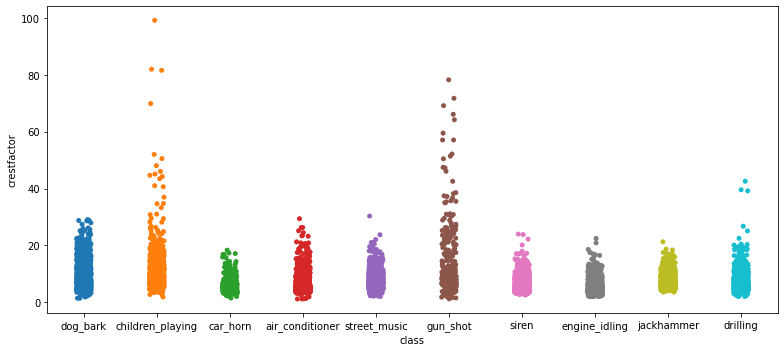

In [40]:
plt.figure(figsize=(11,5))
sns.stripplot(data = eq_df,
             x = 'class',
             y = 'crestfactor')
plt.tight_layout()
plt.show()

In [45]:
display(eq_df)

,class,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,eq_160,...,eq_20000,crestfactor,salience,harmonic_power,percussive_power,harmonic_hits,percussive_hits,fold,power_ratio,hits_ratio
0,dog_bark,-1.375995,-1.494469,-1.451719,-1.281426,-0.658946,-0.689535,-0.606677,-0.516618,-0.041881,...,-1.218624,7.006769,1,0.000005,2.825963e-03,11.321429,1,5,2.725290,-1.055247
1,children_playing,0.856480,0.821880,0.997462,0.783837,0.912475,0.721754,0.758189,0.456822,0.275369,...,-2.786653,11.940308,1,0.000006,2.081879e-05,133.344928,0,5,0.553428,-3.301030
2,children_playing,0.819386,0.792283,0.720321,0.789714,0.724272,0.727021,0.766071,0.408717,0.278678,...,-2.758088,8.454538,1,0.000016,3.140698e-07,87.182609,2,5,-1.699984,-1.630523
3,children_playing,0.772997,0.642017,0.714451,0.829689,0.603400,0.852557,0.792330,0.878636,0.348520,...,-2.753478,9.255638,1,0.000011,8.845374e-05,150.472464,4,5,0.889862,-1.567587
4,children_playing,0.931373,0.637854,0.799281,1.071200,0.785805,0.841281,0.746758,0.589374,0.427006,...,-2.585378,6.102388,1,0.000028,5.712090e-07,75.727536,0,5,-1.688568,-3.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,car_horn,0.347948,0.570259,0.638040,0.691579,0.886507,0.731664,0.827129,0.521451,0.737978,...,-2.710117,7.153451,2,0.000120,3.828546e-07,207.014493,0,7,-2.496803,-3.301030
8728,car_horn,0.429030,0.195351,0.294981,0.395455,0.494787,0.524111,0.330792,0.117469,0.232678,...,-2.897820,7.721215,2,0.001297,5.428997e-07,108.151351,1,7,-3.378184,-2.011541
8729,car_horn,0.495853,0.243646,0.437378,0.516224,0.719629,0.846666,0.714467,0.705938,1.087829,...,-2.638326,15.893921,2,0.000040,3.741536e-06,126.966887,3,7,-1.031305,-1.617810
8730,car_horn,0.203905,0.320080,0.742148,0.508435,0.971202,0.917490,0.705366,0.574481,0.623488,...,-2.808654,7.465270,2,0.000432,3.024667e-07,73.472477,1,7,-3.155158,-1.851026


In [42]:
eq_df = eq_df.dropna()

In [43]:
nansvec = np.isnan(eq_df['crestfactor'])
nansvec[nansvec==True]

Series([], Name: crestfactor, dtype: bool)

In [44]:
# try classifying with the log instead?
for i in range(0,len(eq_df)):
    eq_df.iloc[i,1:-9] = np.log10(eq_df.iloc[i,1:-9].values.astype(float))

In [46]:
def TPR(prediction, data, numclasses):
    """
    Returns True Positive Ratio given a prediction and data
    """
    confmat = confusion_matrix(prediction, data)

#     TN = confmat[0,0]
#     FP = confmat[0,1]
#     FN = confmat[1,0]
#     TP = confmat[1,1]
    TP = np.zeros(numclasses)
    FN = np.zeros(numclasses)
    R = np.zeros(numclasses)
    for i in range(numclasses):
        TP[i] = confmat[i,i]
        FN[i] = confmat[i,:].sum() - confmat[i,i]
    
    R = TP/(TP + FN)
    
    
    return R
    

In [47]:
def recall(prediction, data, numclasses):
    """
    Calculates recall of a prediction
    """
    
    confmat = confusion_matrix(prediction, data)

#     TN = confmat[0,0]
#     FP = confmat[0,1]
#     FN = confmat[1,0]
#     TP = confmat[1,1]
#     TP = confmat[6,6]
#     FN = confmat[6,:] - confmat[6,6]
    TP = np.zeros(numclasses)
    R = np.zeros(numclasses)
    FN = np.zeros(numclasses)
    for i in range(numclasses):
        TP[i] = confmat[i,i]
        FN[i] = confmat[i,:].sum() - confmat[i,i]
    
    R = TP/(TP + FN)
    
    return R

def precision(prediction, data,numclasses):
    """
    Calculates precision of a prediction
    """
    
    confmat = confusion_matrix(prediction, data)

#     TN = confmat[0,0]
#     FP = confmat[0,1]
#     FN = confmat[1,0]
#     TP = confmat[1,1]
#     TP = confmat[6,6]
#     FP = confmat[:,6].sum() - confmat[6,6]
    TP = np.zeros(numclasses)
    FP = np.zeros(numclasses)
    P = np.zeros(numclasses)
    for i in range(numclasses):
        TP[i] = confmat[i,i]
        FP[i] = confmat[:,i].sum() - confmat[i,i]
    
    P = TP/(TP + FP)
    
    return P

In [48]:
def Fmeasure(prediction, data, numclasses):
    """
    Returns Fmeasure. 
    
    This is considered a balance of the precision and the recall.
    
    F = (2*P*R)/(P+R)
    
    where
    
    P = TP/(TP + FP) is the precision and
    R = TP/(TP + FN) is the recall.
    
    Reference: 
    Müller, Meinard. Fundamentals of music processing: Audio, analysis, algorithms, applications. 
    Vol. 5. Cham: Springer, 2015.
    Sec. 4.5 pp. 217
    """
    confmat = confusion_matrix(prediction, data)

#     TN = confmat[0,0]
#     FP = confmat[0,1]
#     FN = confmat[1,0]
#     TP = confmat[1,1]
#     TP = confmat[6,6]
#     FN = confmat[6,:].sum() - confmat[6,6]
#     FP = confmat[:,6].sum() - confmat[6,6]
    TP = np.zeros(numclasses)
    FN = np.zeros(numclasses)
    FP = np.zeros(numclasses)
    P = np.zeros(numclasses)
    R = np.zeros(numclasses)
    for i in range(numclasses):
        TP[i] = confmat[i,i]
        FN[i] = confmat[i,:].sum() - confmat[i,i]
        FP[i] = confmat[:,i].sum() - confmat[i,i]
    
    P = TP/(TP + FP)
    R = TP/(TP + FN)
    
    F = (2*P*R)/(P + R)

    return F
    

In [67]:
eq_df2 = eq_df.copy()
eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
                'engine_idling':5, 'gun_shot':6, 'jackhammer':7, 'siren':8, 'street_music':9},inplace=True)
# eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
#                 'engine_idling':0, 'gun_shot':5, 'jackhammer':4, 'siren':6, 'street_music':2},inplace=True)
# eq_df2.replace({'air_conditioner':0, 'car_horn':0, 'children_playing':0, 'dog_bark':0, 'drilling':0,
#                 'engine_idling':0, 'gun_shot':1, 'jackhammer':0, 'siren':0, 'street_music':0},inplace=True)

Documentation of the dataset suggests not shuffling the dataset. This is because there are a number of audio files that are taken as sections from longer audio files and will result in anomalous results if these are shuffled together. Instead the dataset has included a psuedorandom "fold" category to serve as splits for cross validation. 

In [68]:
dropfold = 1

In [69]:
eq_df3 = eq_df2.drop(eq_df2[eq_df2['fold']==dropfold].index)

In [70]:
eq_df3[eq_df3['fold']==dropfold].values

array([], shape=(0, 33), dtype=float64)

In [71]:
eq_df3.drop(columns='fold',inplace=True)
eq_df3.drop(columns='salience',inplace=True)

In [72]:
eq_df3.head()

,class,eq_0,eq_10,eq_20,eq_30,eq_40,eq_60,eq_80,eq_120,eq_160,...,eq_10000,eq_15000,eq_20000,crestfactor,harmonic_power,percussive_power,harmonic_hits,percussive_hits,power_ratio,hits_ratio
0,3,-1.375995,-1.494469,-1.451719,-1.281426,-0.658946,-0.689535,-0.606677,-0.516618,-0.041881,...,-0.347958,-0.953458,-1.218624,7.006769,0.000005,2.825963e-03,11.321429,1,2.725290,-1.055247
1,2,0.856480,0.821880,0.997462,0.783837,0.912475,0.721754,0.758189,0.456822,0.275369,...,-1.672101,-2.697381,-2.786653,11.940308,0.000006,2.081879e-05,133.344928,0,0.553428,-3.301030
2,2,0.819386,0.792283,0.720321,0.789714,0.724272,0.727021,0.766071,0.408717,0.278678,...,-1.925389,-2.676538,-2.758088,8.454538,0.000016,3.140698e-07,87.182609,2,-1.699984,-1.630523
3,2,0.772997,0.642017,0.714451,0.829689,0.603400,0.852557,0.792330,0.878636,0.348520,...,-1.094309,-2.093313,-2.753478,9.255638,0.000011,8.845374e-05,150.472464,4,0.889862,-1.567587
4,2,0.931373,0.637854,0.799281,1.071200,0.785805,0.841281,0.746758,0.589374,0.427006,...,-1.731566,-2.511827,-2.585378,6.102388,0.000028,5.712090e-07,75.727536,0,-1.688568,-3.301030


In [73]:
eq_df3.iloc[1,1:].values

array([ 8.56480394e-01,  8.21879725e-01,  9.97462157e-01,  7.83837308e-01,
        9.12475057e-01,  7.21753910e-01,  7.58189426e-01,  4.56822175e-01,
        2.75368979e-01,  2.09168448e-01,  2.28524036e-01,  6.45280007e-02,
        6.88600625e-02,  4.72408821e-02,  2.33581567e-01,  2.80035927e-01,
        2.36004290e-01, -1.02432179e-01, -9.53750670e-01, -9.91828274e-01,
       -1.67210058e+00, -2.69738092e+00, -2.78665285e+00,  1.19403085e+01,
        5.82140216e-06,  2.08187863e-05,  1.33344928e+02,  0.00000000e+00,
        5.53427804e-01, -3.30103000e+00])

In [85]:
X_train = eq_df3.iloc[:,1:].values
# X_train = [eq_df3.iloc[:,1:-2].values, eq_df3.iloc[:,-1]]
X_train.shape

(7668, 30)

In [76]:
y_train = eq_df3.iloc[:,0].values
y_train

array([3, 2, 2, ..., 1, 1, 1])

In [88]:
X_val = eq_df2[eq_df2['fold'] == dropfold].copy()
X_val.drop(columns='fold',inplace=True)
X_val.drop(columns='salience',inplace=True)
X_val = X_val.iloc[:,1:].values
y_val = eq_df2[eq_df2['fold'] == dropfold]
y_val = y_val.iloc[:,0].values
X_val.shape

(824, 30)

In [89]:
np.any(np.isinf(X_val))

False

In [90]:
y_val

array([3, 3, 3, 3, 6, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 9, 9, 9,
       9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 3, 5, 5, 5, 5, 5, 5, 5, 5, 6, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3,
       0, 3, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9,
       9, 9, 9, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 4, 4,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 2, 2, 2, 1, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [91]:
from sklearn.neural_network import MLPClassifier

In [92]:
mlp = MLPClassifier(hidden_layer_sizes=(150,150,150,150,150,), max_iter=100000,early_stopping=True)

In [93]:
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(150, 150, 150, 150, 150),
              max_iter=100000)

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Here we consider the True Positive Rate for the gunshot data as an indicator of the goodness of fit. Interestingly this is often higher when the classifier can classify into multiple categories than simply gunshot/not gunshot.

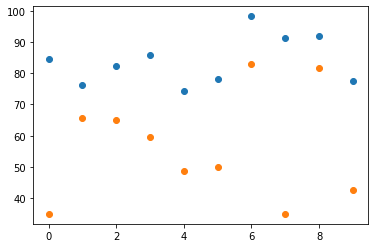

In [94]:
# confmat = confusion_matrix(y_train, mlp.predict(X_train))
# acc = 100*confmat[1,1] / (np.sum(np.sum(confmat[1,:])))
# print("Training accuracy of", acc)
# confmat = confusion_matrix(y_val, mlp.predict(X_val))
# acc = 100*confmat[1,1] / (np.sum(confmat[1,:]))
# print("Validation accuracy of", acc)

# confmat = confusion_matrix(y_train, mlp.predict(X_train))
# acc = 100*confmat[6,6] / (np.sum(np.sum(confmat[6,:])))
acc =100*TPR(y_train, mlp.predict(X_train),10)
acc2 =100*Fmeasure(y_train, mlp.predict(X_train),10)
plt.scatter(range(10),acc)
# print("Training TPR of", acc, "Fmeasure of", acc2)
# confmat = confusion_matrix(y_val, mlp.predict(X_val))
# acc = 100*confmat[6,6] / (np.sum(confmat[6,:]))
acc = 100*TPR(y_val, mlp.predict(X_val),10)
acc2 = 100*Fmeasure(y_val, mlp.predict(X_val),10)
plt.scatter(range(10),acc)
# print("Validation TPR of", acc, "Fmeasure of", acc2)

In [95]:
pd.DataFrame(confusion_matrix(y_val, mlp.predict(X_val)),
            columns=["predicted "+str(i) for i in range(10)],
            index=["actual "+str(i) for i in range(10)])

# pd.DataFrame(confusion_matrix(y_val, mlp.predict(X_val)),
#             columns=["predicted "+str(i) for i in range(2)],
#             index=["actual "+str(i) for i in range(2)])

,predicted 0,predicted 1,predicted 2,predicted 3,predicted 4,predicted 5,predicted 6,predicted 7,predicted 8,predicted 9
actual 0,35,1,8,6,0,5,0,31,1,13
actual 1,1,21,0,0,2,1,0,0,6,1
actual 2,2,6,65,4,0,5,1,2,8,7
actual 3,4,4,12,59,0,3,3,1,8,5
actual 4,4,10,9,3,38,9,1,3,1,0
actual 5,10,1,6,0,3,48,0,1,27,0
actual 6,0,0,5,1,0,0,29,0,0,0
actual 7,2,8,3,0,35,29,0,42,0,1
actual 8,1,0,9,0,2,2,0,0,63,0
actual 9,7,7,12,4,3,3,0,11,3,37


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
classlabels = {'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4, 'engine_idling':5, 'gun_shot':6, 'jackhammer':7, 'siren':8, 'street_music':9}.keys()

In [ ]:
plt.figure(figsize=(9,9))
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, mlp.predict(X_val)),display_labels=classlabels)
disp.plot(xticks_rotation='vertical')
plt.show()

As suggested by the dataset the most accurate results for a classifier are acheived when averaged over the different possible test/validation splits.

In [96]:
accuracy_vec = np.zeros(10)
for dropfold in range(1,11):
    eq_df2 = eq_df.copy()
    eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
                'engine_idling':5, 'gun_shot':6, 'jackhammer':7, 'siren':8, 'street_music':9},inplace=True)
#     eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
#                 'engine_idling':0, 'gun_shot':6, 'jackhammer':4, 'siren':8, 'street_music':2},inplace=True)
#     eq_df2.replace({'air_conditioner':0, 'car_horn':0, 'children_playing':0, 'dog_bark':0, 'drilling':0,
#                     'engine_idling':0, 'gun_shot':1, 'jackhammer':0, 'siren':0, 'street_music':0},inplace=True)

    eq_df3 = eq_df2.drop(eq_df2[eq_df2['fold']==dropfold].index)
    eq_df3.drop(columns='fold',inplace=True)
    eq_df3.drop(columns='salience',inplace=True)
    X_train = eq_df3.iloc[:,1:].values
    y_train = eq_df3.iloc[:,0].values
    
#     X_val = eq_df2[eq_df2['fold'] == dropfold]
#     X_val = X_val.iloc[:,1:].values
#     y_val = eq_df2[eq_df2['fold'] == dropfold]
#     y_val = y_val.iloc[:,0].values
    
    X_val = eq_df2[eq_df2['fold'] == dropfold].copy()
    X_val.drop(columns='fold',inplace=True)
    X_val.drop(columns='salience',inplace=True)
    X_val = X_val.iloc[:,1:].values
    y_val = eq_df2[eq_df2['fold'] == dropfold]
    y_val = y_val.iloc[:,0].values
    
    mlp = MLPClassifier(hidden_layer_sizes=(150,150,150,150,150,), max_iter=100000, early_stopping=True)
    mlp.fit(X_train, y_train)
#     acc = 100*Fmeasure(y_val, mlp.predict(X_val),7)
    recall = np.round(100*TPR(y_val, mlp.predict(X_val),10)[6],2)
    prec = np.round(100*precision(y_val, mlp.predict(X_val),10)[6],2)
    Fmeas = np.round(100*Fmeasure(y_val, mlp.predict(X_val),10)[6],2)
#     acc = 100*TPR(y_val, mlp.predict(X_val),7)[5]
    print("Validation TPR of", recall, ",\n \tprecision of ", prec, ",\n \tand Fmeasure of", Fmeas, "on fold", str(dropfold))
    accuracy_vec[dropfold-1] = recall
    
print(accuracy_vec)
accuracy_vec.mean()

Validation TPR of 77.14 ,
 	precision of  87.1 ,
 	and Fmeasure of 81.82 on fold 1
Validation TPR of 91.43 ,
 	precision of  94.12 ,
 	and Fmeasure of 92.75 on fold 2
Validation TPR of 94.44 ,
 	precision of  91.89 ,
 	and Fmeasure of 93.15 on fold 3
Validation TPR of 86.84 ,
 	precision of  91.67 ,
 	and Fmeasure of 89.19 on fold 4
Validation TPR of 95.0 ,
 	precision of  73.08 ,
 	and Fmeasure of 82.61 on fold 5
Validation TPR of 95.56 ,
 	precision of  87.76 ,
 	and Fmeasure of 91.49 on fold 6
Validation TPR of 88.24 ,
 	precision of  90.0 ,
 	and Fmeasure of 89.11 on fold 7
Validation TPR of 86.67 ,
 	precision of  86.67 ,
 	and Fmeasure of 86.67 on fold 8
Validation TPR of 90.32 ,
 	precision of  45.9 ,
 	and Fmeasure of 60.87 on fold 9
Validation TPR of 70.97 ,
 	precision of  100.0 ,
 	and Fmeasure of 83.02 on fold 10
[77.14 91.43 94.44 86.84 95.   95.56 88.24 86.67 90.32 70.97]


87.66100000000002

In [99]:
accuracy_vec.std()/np.sqrt(10)

2.3974108742558085

In [ ]:
mlp.predict_proba(X_val)[1]

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
accuracy_vec = np.zeros(10)
for dropfold in range(1,11):
    eq_df2 = eq_df.copy()
    eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
                'engine_idling':5, 'gun_shot':6, 'jackhammer':7, 'siren':8, 'street_music':9},inplace=True)
#     eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
#                 'engine_idling':0, 'gun_shot':6, 'jackhammer':4, 'siren':8, 'street_music':2},inplace=True)
#     eq_df2.replace({'air_conditioner':0, 'car_horn':0, 'children_playing':0, 'dog_bark':0, 'drilling':0,
#                     'engine_idling':0, 'gun_shot':1, 'jackhammer':0, 'siren':0, 'street_music':0},inplace=True)

    eq_df3 = eq_df2.drop(eq_df2[eq_df2['fold']==dropfold].index)
    eq_df3.drop(columns='fold',inplace=True)
    eq_df3.drop(columns='salience',inplace=True)
    X_train = eq_df3.iloc[:,1:].values
    y_train = eq_df3.iloc[:,0].values
    
#     X_val = eq_df2[eq_df2['fold'] == dropfold]
#     X_val = X_val.iloc[:,1:].values
#     y_val = eq_df2[eq_df2['fold'] == dropfold]
#     y_val = y_val.iloc[:,0].values
    
    X_val = eq_df2[eq_df2['fold'] == dropfold].copy()
    X_val.drop(columns='fold',inplace=True)
    X_val.drop(columns='salience',inplace=True)
    X_val = X_val.iloc[:,1:].values
    y_val = eq_df2[eq_df2['fold'] == dropfold]
    y_val = y_val.iloc[:,0].values
    
    mlp1 = MLPClassifier(hidden_layer_sizes=(150,150,150,150,150,), max_iter=100000, early_stopping=True)
    mlp2 = MLPClassifier(hidden_layer_sizes=(150,150,150,150,150,), max_iter=100000, early_stopping=True)
    mlp3 = MLPClassifier(hidden_layer_sizes=(150,150,150,150,150,), max_iter=100000, early_stopping=True)
    mlp4 = MLPClassifier(hidden_layer_sizes=(150,150,150,150,150,), max_iter=100000, early_stopping=True)
    mlp5 = MLPClassifier(hidden_layer_sizes=(150,150,150,150,150,), max_iter=100000, early_stopping=True)


#     mlp.fit(X_train, y_train)
    vote_class = VotingClassifier(estimators=[
                 ('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3), ('mlp4', mlp4), ('mlp5', mlp5)],
                 voting='soft')
    vote_class = vote_class.fit(X_train, y_train)
#     acc = 100*Fmeasure(y_val, mlp.predict(X_val),7)
    recall = np.round(100*TPR(y_val, vote_class.predict(X_val),10)[6],2)
    prec = np.round(100*precision(y_val, vote_class.predict(X_val),10)[6],2)
    Fmeas = np.round(100*Fmeasure(y_val, vote_class.predict(X_val),10)[6],2)
#     acc = 100*TPR(y_val, mlp.predict(X_val),7)[5]
    print("Validation TPR of", recall, ",\n \tprecision of ", prec, ",\n \tand Fmeasure of", Fmeas, "on fold", str(dropfold))
    accuracy_vec[dropfold-1] = recall
    
print(accuracy_vec)
accuracy_vec.mean()

In [ ]:
int(round(np.random.rand()*200,0)+50)

In [ ]:
def randlayer():
    return int(round(np.random.rand()*200,0)+50)

In [ ]:
accuracy_vec = np.zeros(10)
for dropfold in range(1,11):
    eq_df2 = eq_df.copy()
    eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
                'engine_idling':5, 'gun_shot':6, 'jackhammer':7, 'siren':8, 'street_music':9},inplace=True)
#     eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
#                 'engine_idling':0, 'gun_shot':6, 'jackhammer':4, 'siren':8, 'street_music':2},inplace=True)
#     eq_df2.replace({'air_conditioner':0, 'car_horn':0, 'children_playing':0, 'dog_bark':0, 'drilling':0,
#                     'engine_idling':0, 'gun_shot':1, 'jackhammer':0, 'siren':0, 'street_music':0},inplace=True)

    eq_df3 = eq_df2.drop(eq_df2[eq_df2['fold']==dropfold].index)
    eq_df3.drop(columns='fold',inplace=True)
    eq_df3.drop(columns='salience',inplace=True)
    X_train = eq_df3.iloc[:,1:].values
    y_train = eq_df3.iloc[:,0].values
    
#     X_val = eq_df2[eq_df2['fold'] == dropfold]
#     X_val = X_val.iloc[:,1:].values
#     y_val = eq_df2[eq_df2['fold'] == dropfold]
#     y_val = y_val.iloc[:,0].values
    
    X_val = eq_df2[eq_df2['fold'] == dropfold].copy()
    X_val.drop(columns='fold',inplace=True)
    X_val.drop(columns='salience',inplace=True)
    X_val = X_val.iloc[:,1:].values
    y_val = eq_df2[eq_df2['fold'] == dropfold]
    y_val = y_val.iloc[:,0].values
    
    mlp1 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp2 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp3 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp4 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp5 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp6 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp7 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp8 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp9 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp10 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp11 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp12 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp13 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp14 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp15 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp16 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp17 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp18 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp19 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)
    mlp20 = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)


#     mlp.fit(X_train, y_train)
    vote_class = VotingClassifier(estimators=[
                 ('mlp1', mlp1), ('mlp2', mlp2), ('mlp3', mlp3), ('mlp4', mlp4), ('mlp5', mlp5),
                    ('mlp6', mlp6), ('mlp7', mlp7), ('mlp8', mlp8), ('mlp9', mlp9), ('mlp10', mlp10),
                    ('mlp11', mlp11), ('mlp12', mlp12), ('mlp13', mlp13), ('mlp14', mlp14), ('mlp15', mlp15),
                    ('mlp16', mlp16), ('mlp17', mlp17), ('mlp18', mlp18), ('mlp19', mlp19), ('mlp20', mlp20)],
                 voting='soft', n_jobs=4)
    vote_class = vote_class.fit(X_train, y_train)
#     acc = 100*Fmeasure(y_val, mlp.predict(X_val),7)
    recall = np.round(100*TPR(y_val, vote_class.predict(X_val),10)[6],2)
    prec = np.round(100*precision(y_val, vote_class.predict(X_val),10)[6],2)
    Fmeas = np.round(100*Fmeasure(y_val, vote_class.predict(X_val),10)[6],2)
#     acc = 100*TPR(y_val, mlp.predict(X_val),7)[5]
    print("Validation TPR of", recall, ",\n \tprecision of ", prec, ",\n \tand Fmeasure of", Fmeas, "on fold", str(dropfold))
    accuracy_vec[dropfold-1] = recall
    
print(accuracy_vec)
accuracy_vec.mean()

In [ ]:
teststr = 'mlp'+str(1)
print(teststr)

In [ ]:
exec('mlp'+str(21)+' = MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True)') 

In [ ]:
mlp21

In [ ]:
def voter_tuple(i):
    teststr = 'mlp'+str(i)
    return (teststr, MLPClassifier(hidden_layer_sizes=(randlayer(),randlayer(),randlayer(),randlayer(),randlayer(),), max_iter=100000, early_stopping=True))

In [ ]:
voter_tuple(2)

In [ ]:
from joblib import dump

In [ ]:
num_voters=2
accuracy_vec = np.zeros(10)
for dropfold in range(1,11):
    eq_df2 = eq_df.copy()
    eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
                'engine_idling':5, 'gun_shot':6, 'jackhammer':7, 'siren':8, 'street_music':9},inplace=True)
#     eq_df2.replace({'air_conditioner':0, 'car_horn':1, 'children_playing':2, 'dog_bark':3, 'drilling':4,
#                 'engine_idling':0, 'gun_shot':6, 'jackhammer':4, 'siren':8, 'street_music':2},inplace=True)
#     eq_df2.replace({'air_conditioner':0, 'car_horn':0, 'children_playing':0, 'dog_bark':0, 'drilling':0,
#                     'engine_idling':0, 'gun_shot':1, 'jackhammer':0, 'siren':0, 'street_music':0},inplace=True)

    eq_df3 = eq_df2.drop(eq_df2[eq_df2['fold']==dropfold].index)
    eq_df3.drop(columns='fold',inplace=True)
    eq_df3.drop(columns='salience',inplace=True)
    X_train = eq_df3.iloc[:,1:].values
    y_train = eq_df3.iloc[:,0].values
    
#     X_val = eq_df2[eq_df2['fold'] == dropfold]
#     X_val = X_val.iloc[:,1:].values
#     y_val = eq_df2[eq_df2['fold'] == dropfold]
#     y_val = y_val.iloc[:,0].values
    
    X_val = eq_df2[eq_df2['fold'] == dropfold].copy()
    X_val.drop(columns='fold',inplace=True)
    X_val.drop(columns='salience',inplace=True)
    X_val = X_val.iloc[:,1:].values
    y_val = eq_df2[eq_df2['fold'] == dropfold]
    y_val = y_val.iloc[:,0].values
    
    voter_list = []
    
    for i in range(num_voters):
        voter_list.append(voter_tuple(i))

#     mlp.fit(X_train, y_train)
    vote_class = VotingClassifier(estimators=voter_list,
                 voting='soft', n_jobs=4)
    vote_class = vote_class.fit(X_train, y_train)
#     acc = 100*Fmeasure(y_val, mlp.predict(X_val),7)
    recall = np.round(100*TPR(y_val, vote_class.predict(X_val),10)[6],2)
    prec = np.round(100*precision(y_val, vote_class.predict(X_val),10)[6],2)
    Fmeas = np.round(100*Fmeasure(y_val, vote_class.predict(X_val),10)[6],2)
#     acc = 100*TPR(y_val, mlp.predict(X_val),7)[5]
    print("Validation TPR of", recall, ",\n \tprecision of ", prec, ",\n \tand Fmeasure of", Fmeas, "on fold", str(dropfold))
    accuracy_vec[dropfold-1] = recall
    dump(vote_class, 'hive_mind_democracy_fold'+str(dropfold)+'.joblib') 
    
print(accuracy_vec)
accuracy_vec.mean()

In [ ]:
from joblib import load

In [ ]:
clf = load('hive_mind_democracy_fold10.joblib') 

In [ ]:
X_val.drop(columns='salience',inplace=True)

In [ ]:
plt.figure(figsize=(9,9))
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, clf.predict(X_val)),display_labels=classlabels)
disp.plot(xticks_rotation='vertical')
plt.show()